<a href="https://colab.research.google.com/github/vaibhavm291/DESIGN-AND-DEVELOPMENT-OF-HYBRID-MODEL-FOR-EFFICIENT-PREDICTION-OF-STOCK-PRICES/blob/main/LR%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

In [25]:
from datetime import datetime

today = datetime.today().strftime('%Y-%m-%d')

# Define the ticker symbol
ticker = "AAPL"

data = yf.download(ticker, start="1980-01-01", end=today)
data = data[["Close"]]

# Recreate the 'Target' column after re-downloading the data
data["Target"] = data["Close"].shift(-1)

# Drop the last row as it will have a NaN in the 'Target' column
data.dropna(inplace=True)

/tmp/ipython-input-25-1109815510.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="1980-01-01", end=today)
[*********************100%***********************]  1 of 1 completed


In [26]:
# 3. Features and target
X = data[["Close"]]
y = data["Target"]

In [27]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [28]:
# 5. Get today's price (most recent close)
latest_price = data.iloc[-1]["Close"]

# 6. Predict tomorrow's price
predicted_tomorrow = model.predict([[latest_price.iloc[0]]])[0]

In [30]:
today_date = data.index[-1].date()
tomorrow_date = today_date + timedelta(days=1)

print("📅 Today's Date:", today_date)
print("💰 Today's Closing Price:", round(latest_price, 2))
print("📈 Predicted Price for", tomorrow_date, ":", round(predicted_tomorrow, 2))

📅 Today's Date: 2025-06-18
💰 Today's Closing Price: Ticker
AAPL    196.58
Name: 2025-06-18 00:00:00, dtype: float64
📈 Predicted Price for 2025-06-19 : 196.65


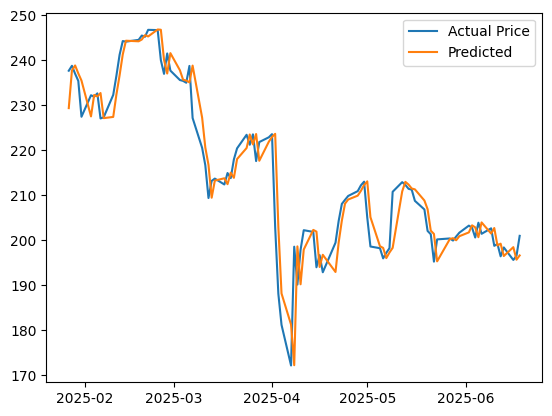

In [32]:
import matplotlib.pyplot as plt

recent_data = data.tail(100)
recent_X = recent_data[["Close"]]
recent_y = recent_data["Target"]
recent_preds = model.predict(recent_X)
plt.plot(recent_data.index, recent_y, label="Actual Price")
plt.plot(recent_data.index, recent_preds, label="Predicted")
plt.legend()
plt.show()